
TRABAJO PRACTICO MATE 3 SOBRE LA PREDICCION DEL TIPO DE VINO (WHITE OR RED(BLANCO O NEGRO))


Al principio queria realizar uno que prediga la calidad del vino por los datos, pero utilizar el coeficiente de relacion me di cuenta que al parecer la calidad entra por otro lado y no se puede predecir solo con estadistica con estos datos

EXTRAIGO EL DATASET A UN DATAFRAME


In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/LorenGrz/TP_FINAL_MATElll/main/WineQuality.csv'
data = pd.read_csv(url)

In [2]:
data.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
data.tail(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6489,red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


ELIMINO LAS FILAS QUE POSEAN NAN

In [5]:
data = data.dropna()
data = data.reset_index(drop=True)

PRIMERO CAMBIO EL DATAFRAME PARA QUE EN VEZ DE QUE EN LA COLUMNA INDIQUE WHITE Y RED SEA WHITE "1" Y RED "0" PARA PODER REALIZAR LOS CALCULOS DE MEJOR MANERA


In [6]:
# Reemplazar los valores en la columna "type"
data['type'] = data['type'].replace({'white': 1, 'red': 0})

# Verificar los cambios

C:\Users\loren\AppData\Local\Temp\ipykernel_11784\87614574.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['type'] = data['type'].replace({'white': 1, 'red': 0})


Imprimo las columnas para verificar el cambio del contenido de la columna


In [7]:
data["type"].head(8)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
Name: type, dtype: int64

In [8]:
data["type"].tail(8)

6455    0
6456    0
6457    0
6458    0
6459    0
6460    0
6461    0
6462    0
Name: type, dtype: int64

ESTANDARIZO LAS COLUMNAS QUE NO SE ENCUENTRAN ENTRE 0 y 1 DIVIDIENDO POR EL MAXIMO YA QUE NO CUENTO CON VALORES NEGATIVOS

DECIDI NO UTILIZAR LAS COLUMNAS CON VALORES ATIPICOS COMO "residual sugar" Y OTRAS CON BAJA CORRELACION

In [9]:
# Definir características y etiquetas que me interesan
features = ["fixed acidity","volatile acidity", "chlorides",
            "free sulfur dioxide","total sulfur dioxide",
            "density","pH", "sulphates"]  # Seleccionar las características relevantes

#Estandarizo las etiquetas dividiendo cada columna de estas por el maximo de esa columna para que sean datos entre 0 y 1
data[features] = data[features] / data[features].max()


# data["chlorides"] = data["chlorides"] / data["chlorides"].max()
# data["density"] = data["density"] / data["density"].max()
# data["total sulfur dioxide"] = data["total sulfur dioxide"]/ data["total sulfur dioxide"].max()
# data["free sulfur dioxide"] = data["free sulfur dioxide"]/ data["free sulfur dioxide"].max()
# data["fixed acidity"] = data["fixed acidity"]/ data["fixed acidity"].max()
# data["volatile acidity"] = data["volatile acidity"]/ data["volatile acidity"].max()
# data["pH"] = data["pH"]/ data["pH"].max()

In [10]:
#Muestro las variables que voy a utilizar y type
data[data["type"] == 0].head(8)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4870,0,0.465409,0.443038,0.00,1.9,0.124386,0.038062,0.077273,0.960365,0.875312,0.280,9.4,5
4871,0,0.490566,0.556962,0.00,2.6,0.160393,0.086505,0.152273,0.959402,0.798005,0.340,9.8,5
4872,0,0.490566,0.481013,0.04,2.3,0.150573,0.051903,0.122727,0.959595,0.812968,0.325,9.8,5
4873,0,0.704403,0.177215,0.56,1.9,0.122750,0.058824,0.136364,0.960557,0.788030,0.290,9.8,6
4874,0,0.465409,0.443038,0.00,1.9,0.124386,0.038062,0.077273,0.960365,0.875312,0.280,9.4,5
4875,0,0.465409,0.417722,0.00,1.8,0.122750,0.044983,0.090909,0.960365,0.875312,0.280,9.4,5
4876,0,0.496855,0.379747,0.06,1.6,0.112930,0.051903,0.134091,0.959017,0.822943,0.230,9.4,5
4877,0,0.459119,0.411392,0.00,1.2,0.106383,0.051903,0.047727,0.957285,0.845387,0.235,10.0,7


In [11]:
data[data["type"] == 1].head(8)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,0.440252,0.170886,0.36,20.7,0.073650,0.155709,0.386364,0.963445,0.748130,0.225,8.8,6
1,1,0.396226,0.189873,0.34,1.6,0.080196,0.048443,0.300000,0.956708,0.822943,0.245,9.5,6
2,1,0.509434,0.177215,0.40,6.9,0.081833,0.103806,0.220455,0.957766,0.812968,0.220,10.1,6
3,1,0.452830,0.145570,0.32,8.5,0.094926,0.162630,0.422727,0.958248,0.795511,0.200,9.9,6
4,1,0.452830,0.145570,0.32,8.5,0.094926,0.162630,0.422727,0.958248,0.795511,0.200,9.9,6
5,1,0.509434,0.177215,0.40,6.9,0.081833,0.103806,0.220455,0.957766,0.812968,0.220,10.1,6
6,1,0.389937,0.202532,0.16,7.0,0.073650,0.103806,0.309091,0.957574,0.793017,0.235,9.6,6
7,1,0.440252,0.170886,0.36,20.7,0.073650,0.155709,0.386364,0.963445,0.748130,0.225,8.8,6


DESCRIBO LAS VARIABLES PARA VERIFICAR

In [12]:
data.loc[:, ["type"] + features].describe()

,type,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.753520,0.453947,0.214930,0.091745,0.105595,0.262942,0.957379,0.802577,0.265575
std,0.430995,0.081630,0.104202,0.057407,0.061449,0.128470,0.002889,0.040062,0.074457
min,0.000000,0.238994,0.050633,0.014730,0.003460,0.013636,0.950076,0.678304,0.110000
25%,1.000000,0.402516,0.145570,0.062193,0.058824,0.175000,0.955100,0.775561,0.215000
50%,1.000000,0.440252,0.183544,0.076923,0.100346,0.268182,0.957564,0.800499,0.255000
75%,1.000000,0.484277,0.253165,0.106383,0.141869,0.354545,0.959595,0.827930,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


BUSCO CORRELACION DE LAS CARACTERISTICAS DEL VINO

In [13]:
# Imprimir correlaciones entre variables
correlations = data.corr(method='pearson')
correlations

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.488552,-0.653374,0.185892,0.349358,-0.512705,0.472653,0.700521,-0.391437,-0.328474,-0.486715,0.035095,0.119185
fixed acidity,-0.488552,1.000000,0.221066,0.323744,-0.113442,0.299104,-0.283485,-0.330543,0.459713,-0.251121,0.301263,-0.096190,-0.076174
volatile acidity,-0.653374,0.221066,1.000000,-0.377512,-0.196677,0.377995,-0.353402,-0.414729,0.272101,0.260134,0.225656,-0.039528,-0.266677
citric acid,0.185892,0.323744,-0.377512,1.000000,0.142324,0.039412,0.132271,0.194398,0.097068,-0.327860,0.059070,-0.010056,0.084926
residual sugar,0.349358,-0.113442,-0.196677,0.142324,1.000000,-0.128814,0.403449,0.495684,0.551494,-0.266481,-0.185616,-0.359132,-0.034654
chlorides,-0.512705,0.299104,0.377995,0.039412,-0.128814,1.000000,-0.195428,-0.279602,0.363108,0.044653,0.396240,-0.257664,-0.200553
free sulfur dioxide,0.472653,-0.283485,-0.353402,0.132271,0.403449,-0.195428,1.000000,0.721476,0.025113,-0.145164,-0.188947,-0.179477,0.054924
total sulfur dioxide,0.700521,-0.330543,-0.414729,0.194398,0.495684,-0.279602,0.721476,1.000000,0.031419,-0.237204,-0.275878,-0.264385,-0.041598
density,-0.391437,0.459713,0.272101,0.097068,0.551494,0.363108,0.025113,0.031419,1.000000,0.012525,0.260019,-0.687432,-0.304447
pH,-0.328474,-0.251121,0.260134,-0.327860,-0.266481,0.044653,-0.145164,-0.237204,0.012525,1.000000,0.190864,0.120473,0.018403


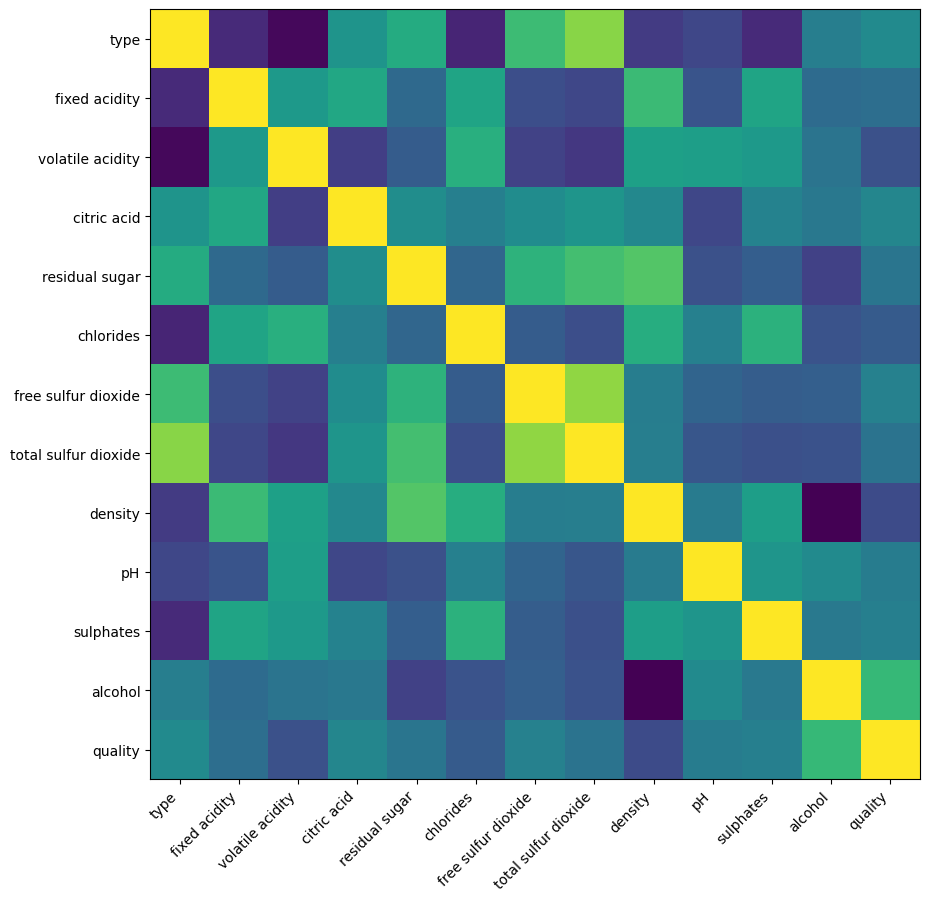

In [14]:
import matplotlib.pyplot as plt

labels = data.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((data.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(data.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(data.columns.to_list(), ha='right');

GRAFICO LAS DE MI INTERES

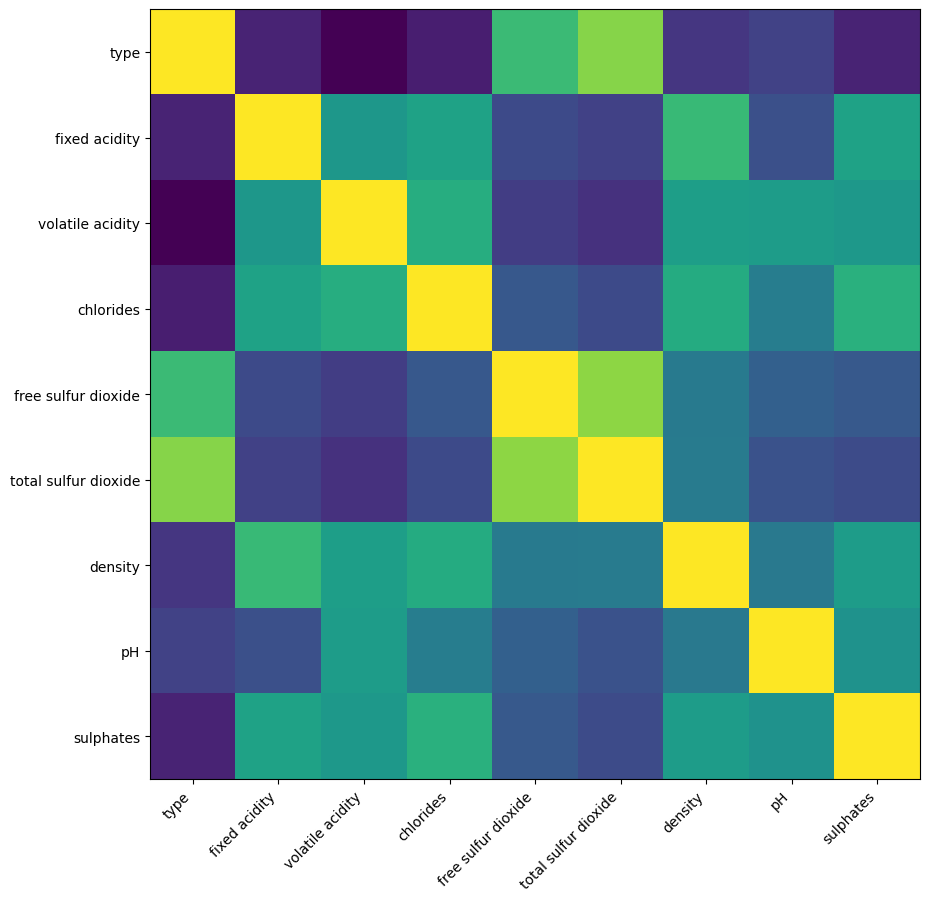

In [15]:
labels = data.loc[:, ["type"] + features].columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((data.loc[:, ["type"] + features].corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(data.loc[:, ["type"] + features].columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(data.loc[:, ["type"] + features].columns.to_list(), ha='right');

UTILIZO LOS DATOS CORRELACIONADOS Y QUE ME INTERESAN PARA LA FORDWARD PROPAGATION

In [16]:
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

X = data[features].values
Y = data['type'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4)

C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)
np.random.seed(6)
# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(4, 8)
w_output = np.random.rand(1, 4)

b_hidden = np.random.rand(4, 1)
b_output = np.random.rand(1, 1)

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

#print(b_hidden)
#print(b_output)
#print(w_hidden)
#print(w_output)

# Función para propagar hacia adelante (forward propagation)
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    #print(f'{Z1=}')
    A1 = relu(Z1)
    #print(f'{A1=}')
    Z2 = w_output @ A1 + b_output
    #print(f'{Z2=}')
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

4847


CALCULO LA PRECISION DE MI FORDWARE PROPAGATION

In [18]:
# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]  # Solo nos interesa la capa de salida, A2
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales

In [19]:
print("ACCURACY: ", accuracy)

ACCURACY:  0.7611386138613861


DA 75 O MAS DE ACCURACY YA QUE EL 75 O MAS % DE LOS VINOS EN MI DATAFRAME SON BLANCOS, CON LO QUE UN NUMERO RANDOM ENTRE 1 Y 0 ESTADISTICAMENTE VA A ACERTAR UN 75/100 VECES

Realizo el descenso de gradiente estocástico para entrenar a la red neuronal

In [20]:
accuracy_test_l = []
accuracy_train_l = []
cont = 0
L = 0.005  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in tqdm(range(100000)):
    cont += 1
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2
    
    if (cont % 1000) == 0 :
        # Cálculo de precisión del test
        test_predictions = forward_prop(X_test.transpose())[3]  # Solo nos interesa la capa de salida, A2
        test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
        accuracy_TEST = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
        accuracy_test_l.append(accuracy_TEST)

        # Cálculo de precisión del train
        train_predictions = forward_prop(X_train.transpose())[3]  # Solo nos interesa la capa de salida, A2
        train_predictions = (train_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
        accuracy_TRAIN = np.mean(train_predictions == Y_train.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
        accuracy_train_l.append(accuracy_TRAIN)

100%|██████████| 100000/100000 [00:22<00:00, 4523.00it/s]


calculo las acurracy cada 1000 iteraciones porque si no tarda mucho en calcularse

In [21]:
# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]  # Solo nos interesa la capa de salida, A2
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales

In [22]:
print("ACCURACY: ", accuracy)

ACCURACY:  0.9777227722772277


DA UNA PRECISION EN EL MOMENTO EN QUE LA ENTRENE DE 0.9826732673267327

CREO UN GRAFICO PARA VISUALIZAR LA MEJORIA DE LA ACCURRACY A MEDIDA QUE ITERAMOS

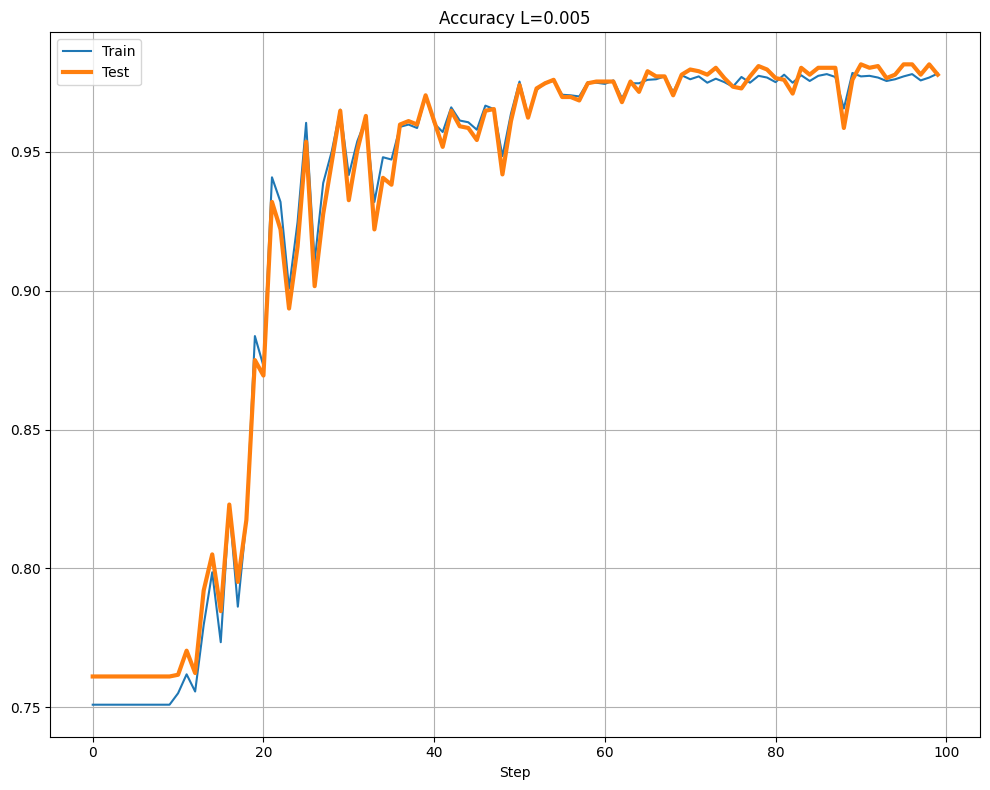

In [23]:
import matplotlib.pyplot as plt

fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw' : 3,
}
fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw' : 3,
}

fig, (ax) = plt.subplots(1,1,figsize=(10,8))

ax.plot(accuracy_train_l, label='Train')
ax.plot(accuracy_test_l, label='Test', **fmt_test)
ax.grid(which='both')
ax.legend()

ax.set_title(f'Accuracy {L=}')
ax.set_xlabel('Step')

fig.tight_layout()

plt.show()

Creo una red modificable

In [26]:
def miRed(L, iters):
    accuracy_test_l = []
    accuracy_train_l = []
    cont = 0
    # Número de registros de entrenamiento
    n = X_train.shape[0]
    print(n)
    np.random.seed(6)
    # Inicializar los pesos y sesgos de la red neuronal
    w_hidden = np.random.rand(4, 8)
    w_output = np.random.rand(1, 4)

    b_hidden = np.random.rand(4, 1)
    b_output = np.random.rand(1, 1)

    # Funciones de activación
    relu = lambda x: np.maximum(x, 0)
    logistic = lambda x: 1 / (1 + np.exp(-x))

    #print(b_hidden)
    #print(b_output)
    #print(w_hidden)
    #print(w_output)

    # Función para propagar hacia adelante (forward propagation)
    def forward_prop(X):
        Z1 = w_hidden @ X + b_hidden
        #print(f'{Z1=}')
        A1 = relu(Z1)
        #print(f'{A1=}')
        Z2 = w_output @ A1 + b_output
        #print(f'{Z2=}')
        A2 = logistic(Z2)
        return Z1, A1, Z2, A2
    # Devuelve pendientes para pesos y sesgos
    # usando la regla de la cadena
    
    def backward_prop(Z1, A1, Z2, A2, X, Y):
        dC_dA2 = 2 * A2 - 2 * Y
        dA2_dZ2 = logistic(Z2)
        dZ2_dA1 = w_output
        dZ2_dW2 = A1
        dZ2_dB2 = 1
        dA1_dZ1 = relu(Z1)
        dZ1_dW1 = X
        dZ1_dB1 = 1

        dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

        dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

        dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

        dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

        dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2

    # Ejecutar descenso de gradiente
    for i in tqdm(range(iters)):
        cont += 1
        # seleccionar aleatoriamente un conjunto de datos de entrenamiento
        idx = np.random.choice(n, 1, replace=False)
        X_sample = X_train[idx].transpose()
        Y_sample = Y_train[idx]

        # pasar datos seleccionados aleatoriamente a través de la red neuronal
        Z1, A1, Z2, A2 = forward_prop(X_sample)

        # distribuir error a través de la retropropagación
        # y devolver pendientes para pesos y sesgos
        dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

        # actualizar pesos y sesgos
        w_hidden -= L * dW1
        b_hidden -= L * dB1
        w_output -= L * dW2
        b_output -= L * dB2
        if (cont % 1000) == 0 :
            # Cálculo de precisión del test
            test_predictions = forward_prop(X_test.transpose())[3]  # Solo nos interesa la capa de salida, A2
            test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
            accuracy_TEST = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
            accuracy_test_l.append(accuracy_TEST)

            # Cálculo de precisión del train
            train_predictions = forward_prop(X_train.transpose())[3]  # Solo nos interesa la capa de salida, A2
            train_predictions = (train_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
            accuracy_TRAIN = np.mean(train_predictions == Y_train.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
            accuracy_train_l.append(accuracy_TRAIN)
            
    # Cálculo de precisión
    test_predictions = forward_prop(X_test.transpose())[3]  # Solo nos interesa la capa de salida, A2
    test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
    accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
    print("ACCURACY: ", accuracy)
    import matplotlib.pyplot as plt
    fmt_train = {
        'color': 'tab:blue',
        'ls': 'solid',
        'lw' : 3,
    }
    fmt_test = {
        'color': 'tab:orange',
        'ls': 'solid',
        'lw' : 3,
    }

    fig, (ax) = plt.subplots(1,1,figsize=(10,8))

    ax.plot(accuracy_train_l, label='Train')
    ax.plot(accuracy_test_l, label='Test', **fmt_test)
    ax.grid(which='both')
    ax.legend()

    ax.set_title(f'Accuracy {L=}')
    ax.set_xlabel('Step')

    fig.tight_layout()

    plt.show()

La utilizo para visualizar cual es la que mas rinde

4847


100%|██████████| 100/100 [00:00<00:00, 3432.13it/s]

ACCURACY:  0.7611386138613861


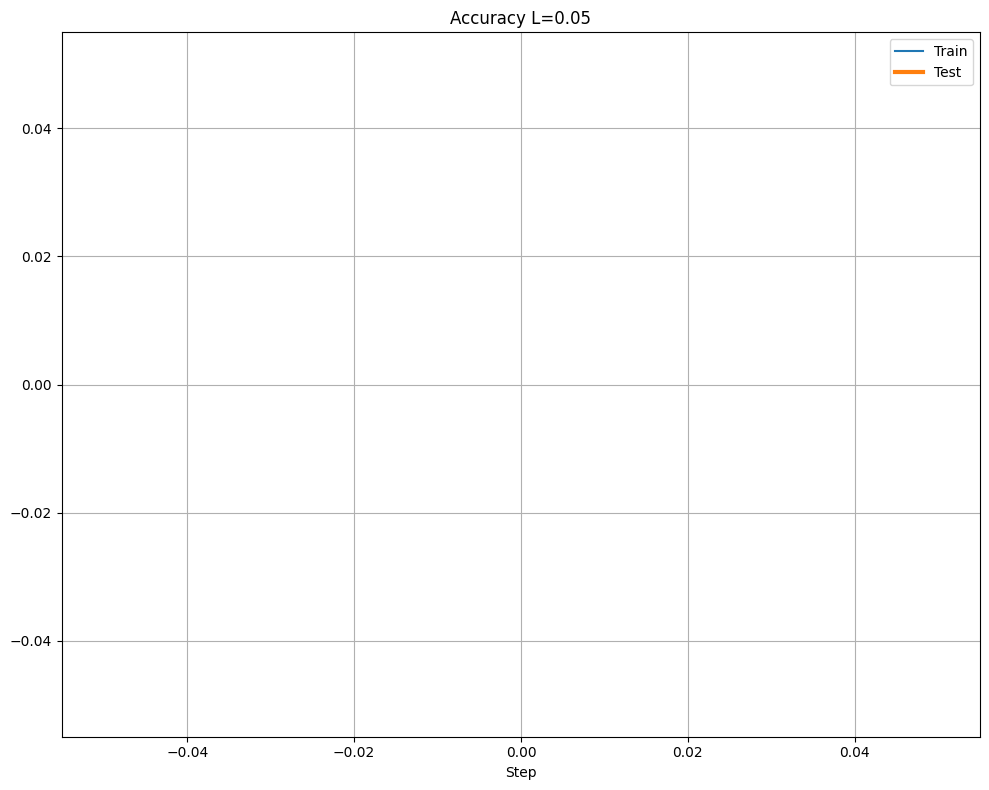

4847


100%|██████████| 100/100 [00:00<00:00, 3462.25it/s]

ACCURACY:  0.7611386138613861


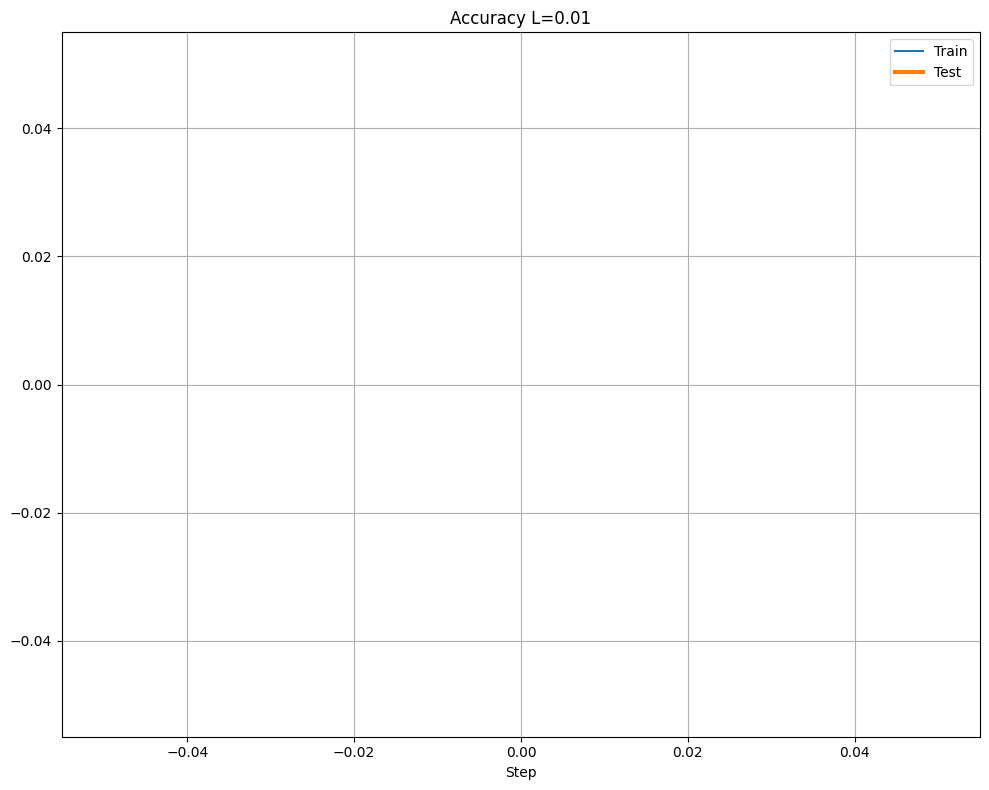

4847


100%|██████████| 100/100 [00:00<00:00, 3548.99it/s]

ACCURACY:  0.7611386138613861


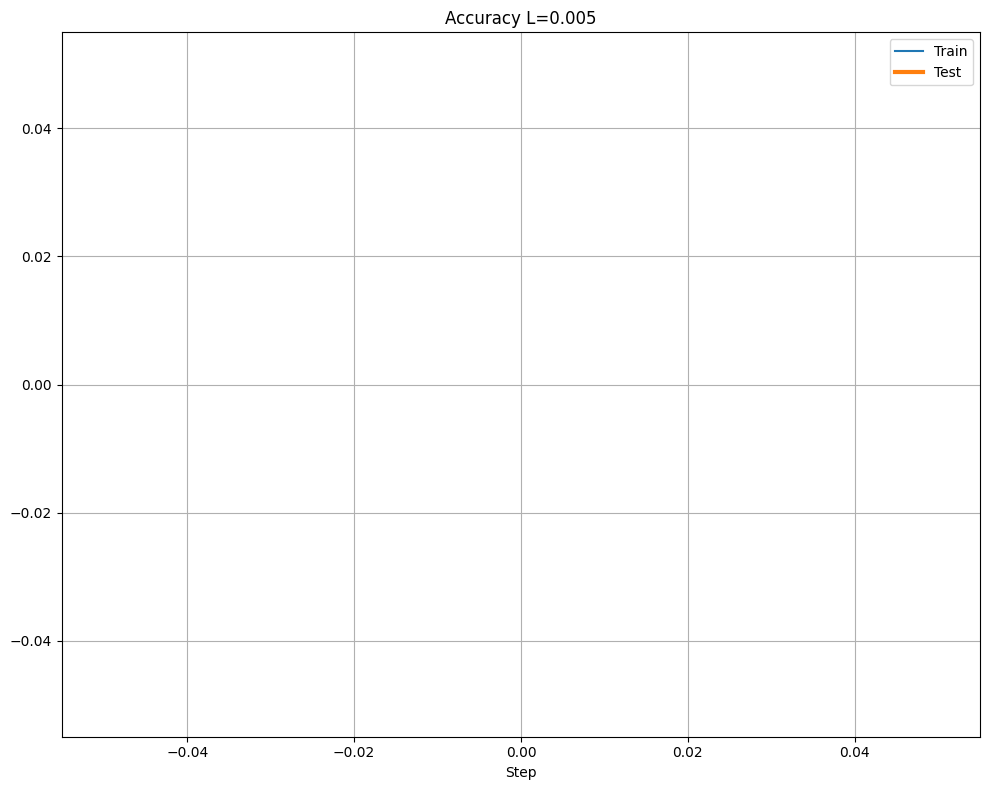

4847


100%|██████████| 100/100 [00:00<00:00, 3164.92it/s]

ACCURACY:  0.7611386138613861


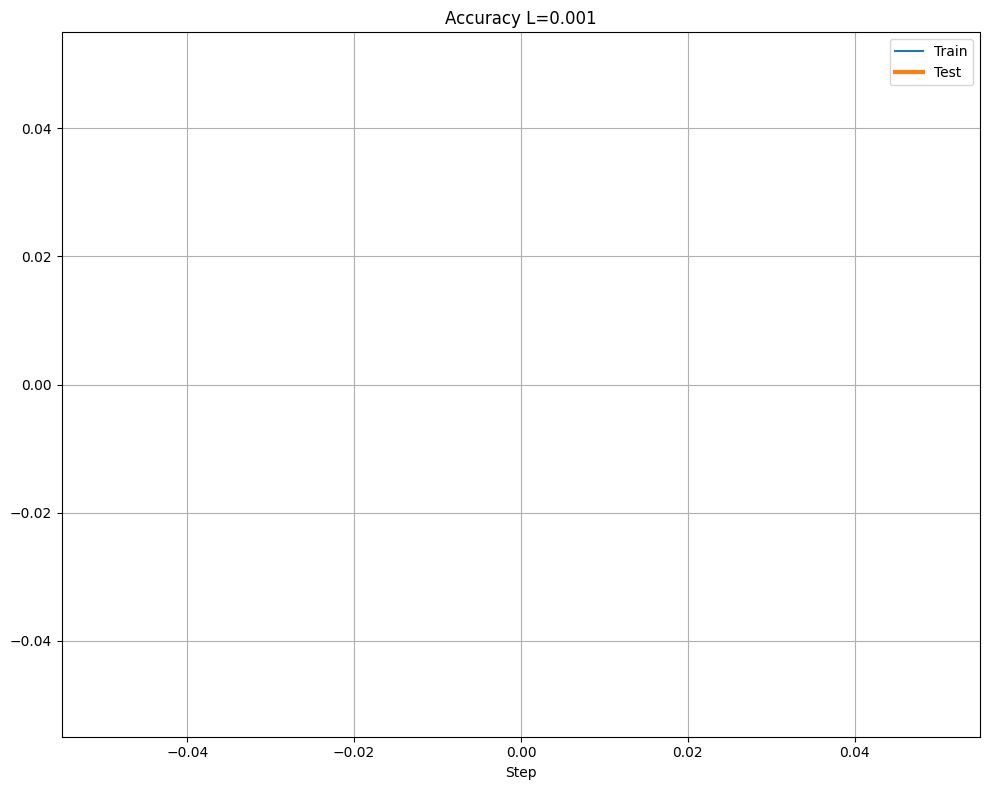

4847


100%|██████████| 1000/1000 [00:00<00:00, 3735.55it/s]


ACCURACY:  0.7902227722772277


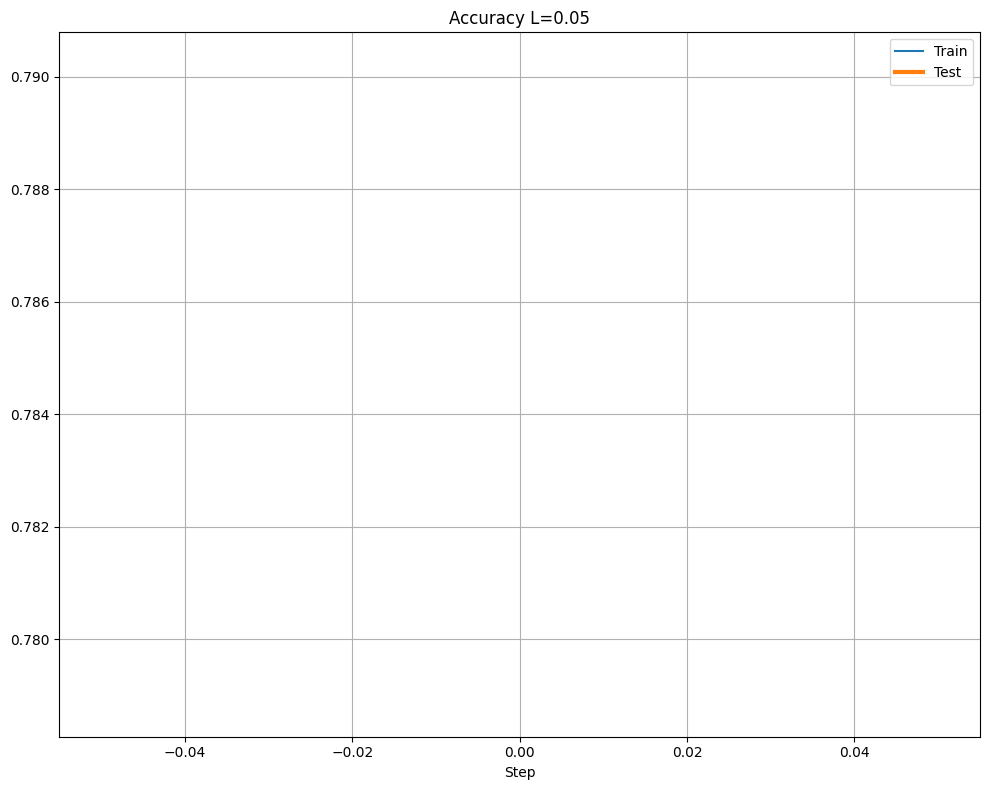

4847


100%|██████████| 1000/1000 [00:00<00:00, 3599.65it/s]


ACCURACY:  0.7611386138613861


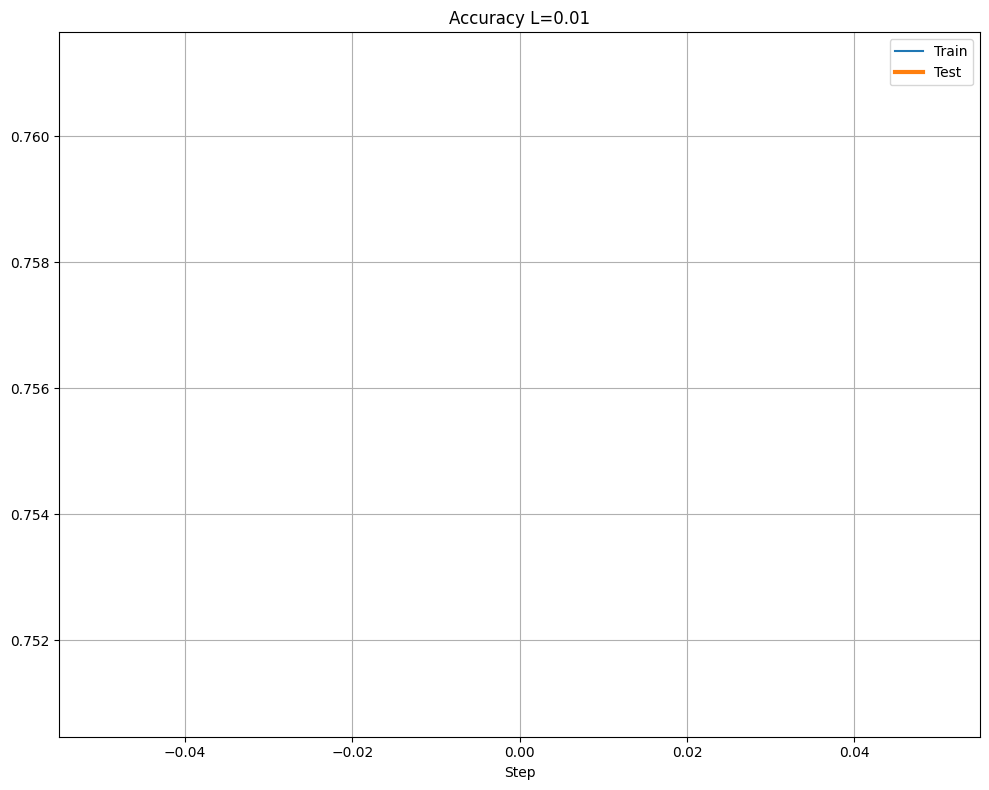

4847


100%|██████████| 1000/1000 [00:00<00:00, 3912.16it/s]


ACCURACY:  0.7611386138613861


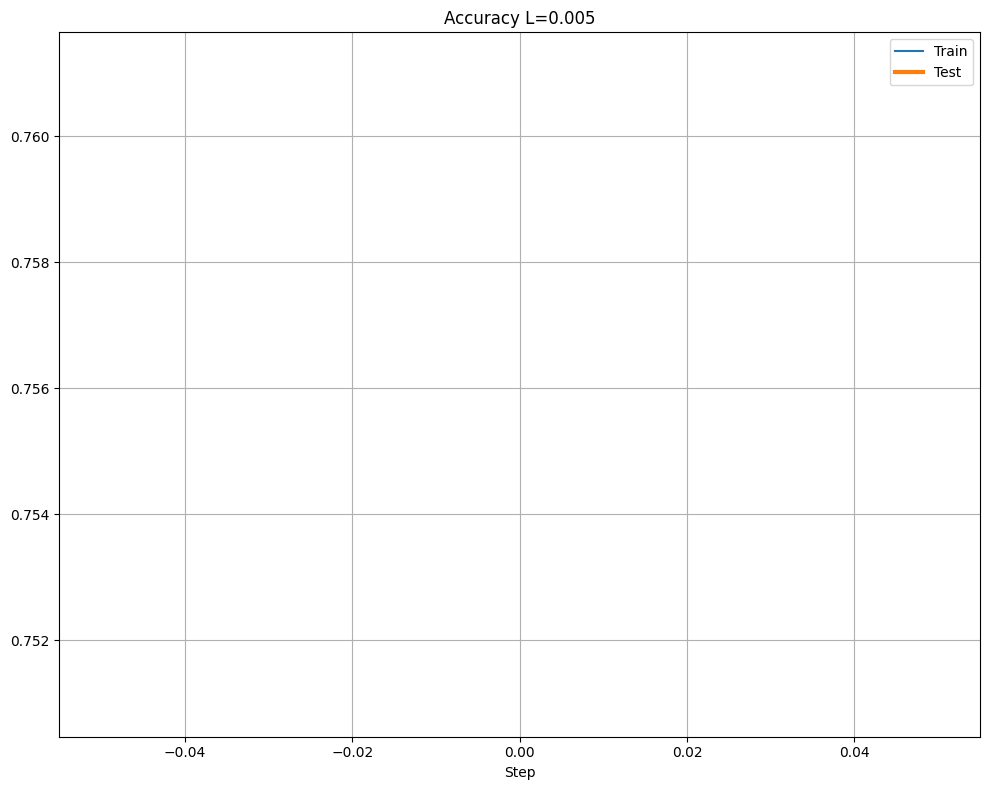

4847


100%|██████████| 1000/1000 [00:00<00:00, 4032.86it/s]


ACCURACY:  0.7611386138613861


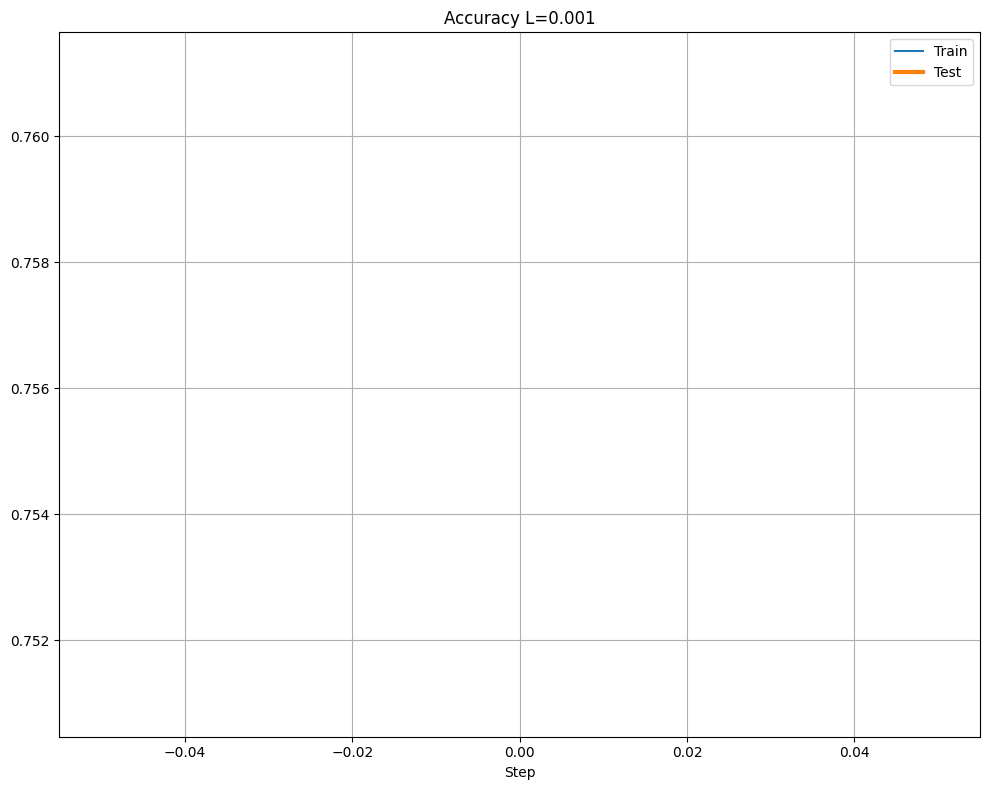

4847


100%|██████████| 10000/10000 [00:02<00:00, 3615.77it/s]


ACCURACY:  0.7611386138613861


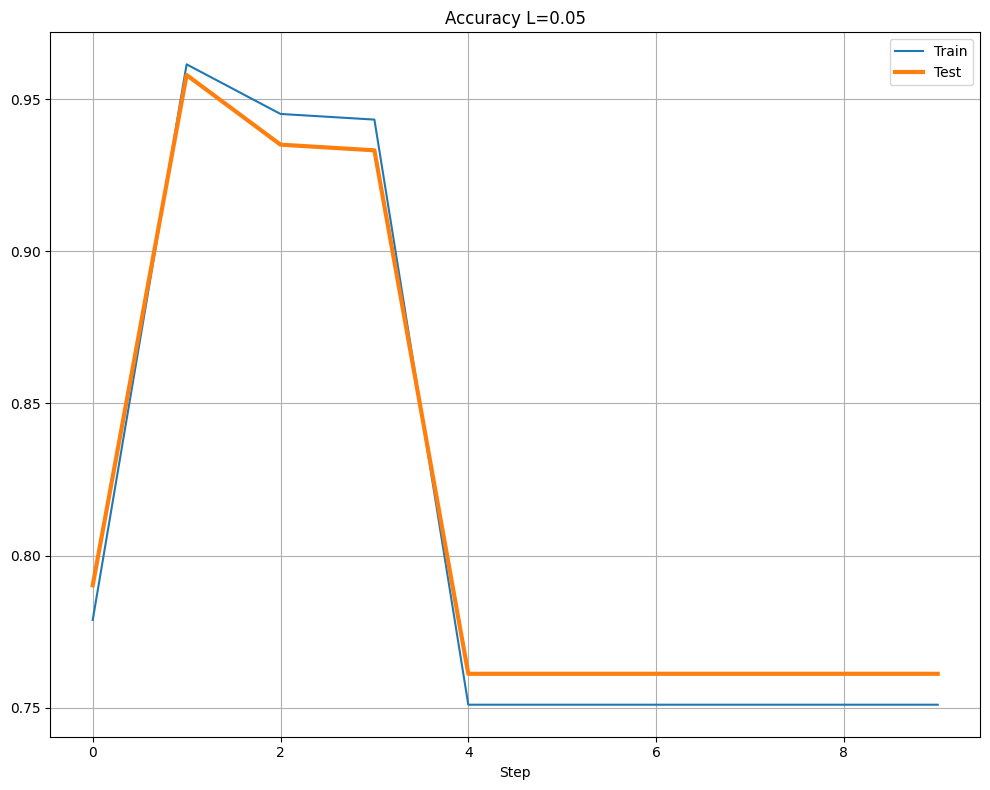

4847


100%|██████████| 10000/10000 [00:02<00:00, 3932.08it/s]


ACCURACY:  0.8886138613861386


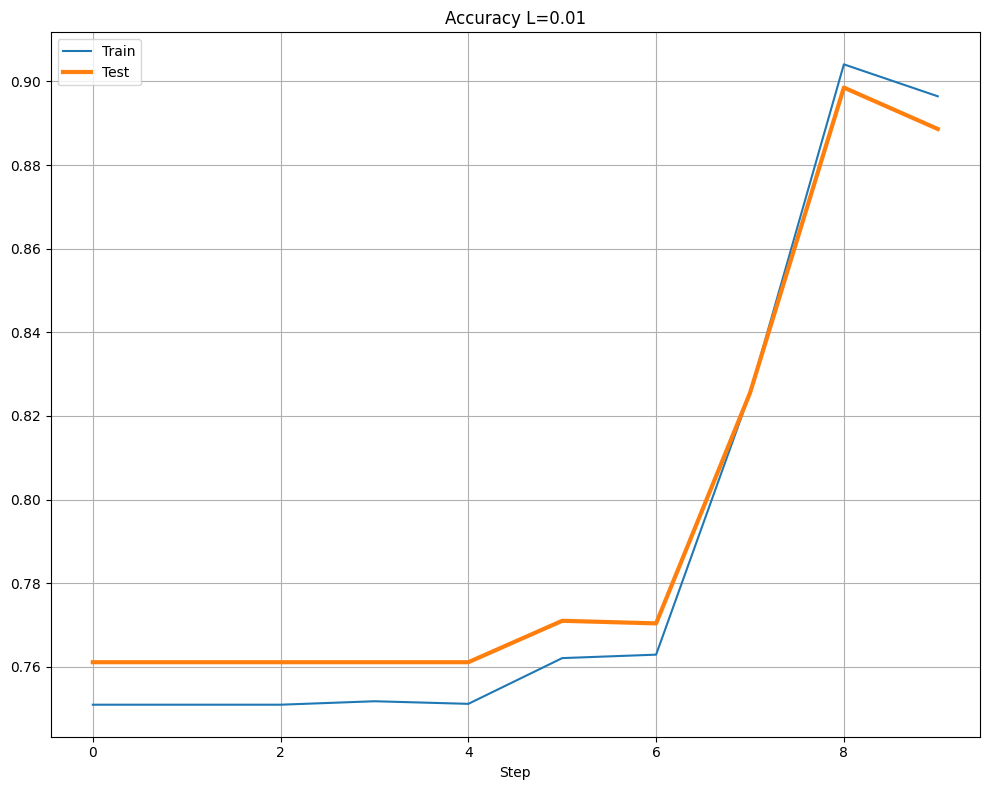

4847


100%|██████████| 10000/10000 [00:02<00:00, 4949.81it/s]


ACCURACY:  0.7611386138613861


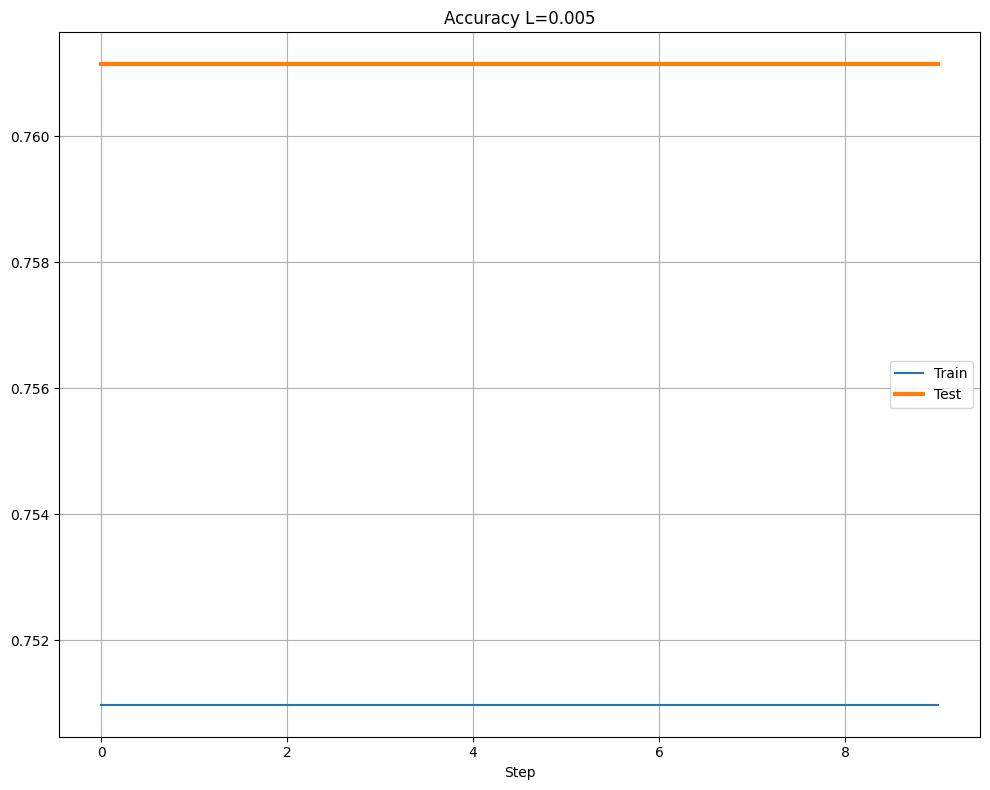

4847


100%|██████████| 10000/10000 [00:01<00:00, 5027.37it/s]


ACCURACY:  0.7611386138613861


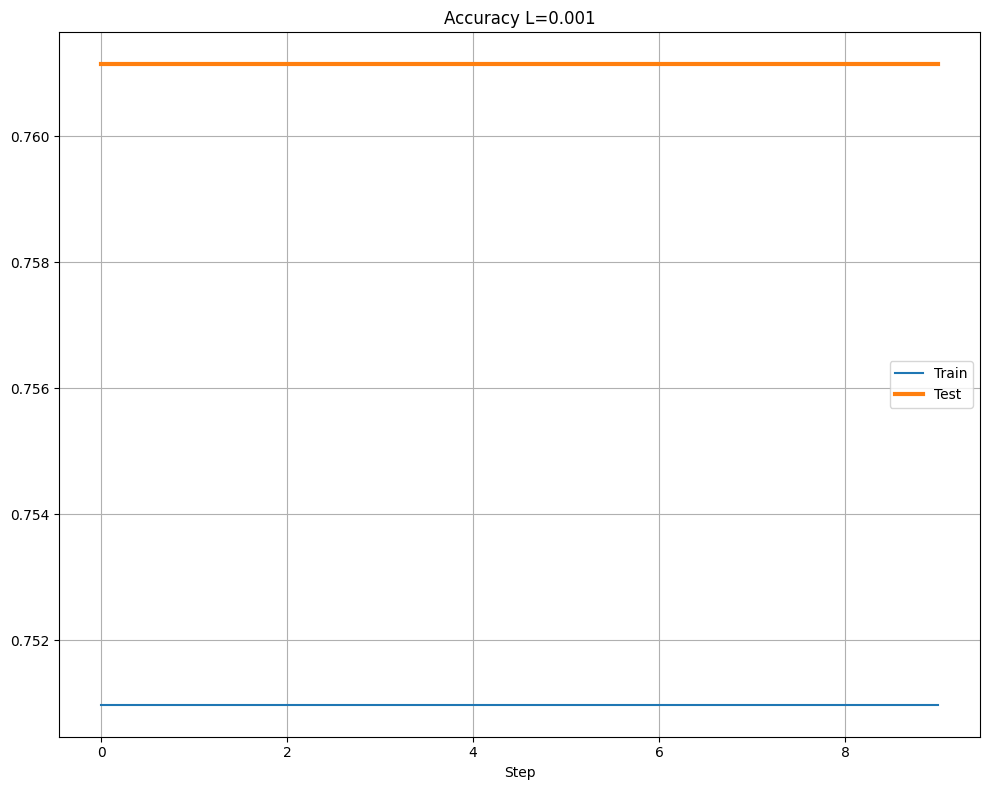

4847


100%|██████████| 100000/100000 [00:20<00:00, 4935.65it/s]


ACCURACY:  0.7611386138613861


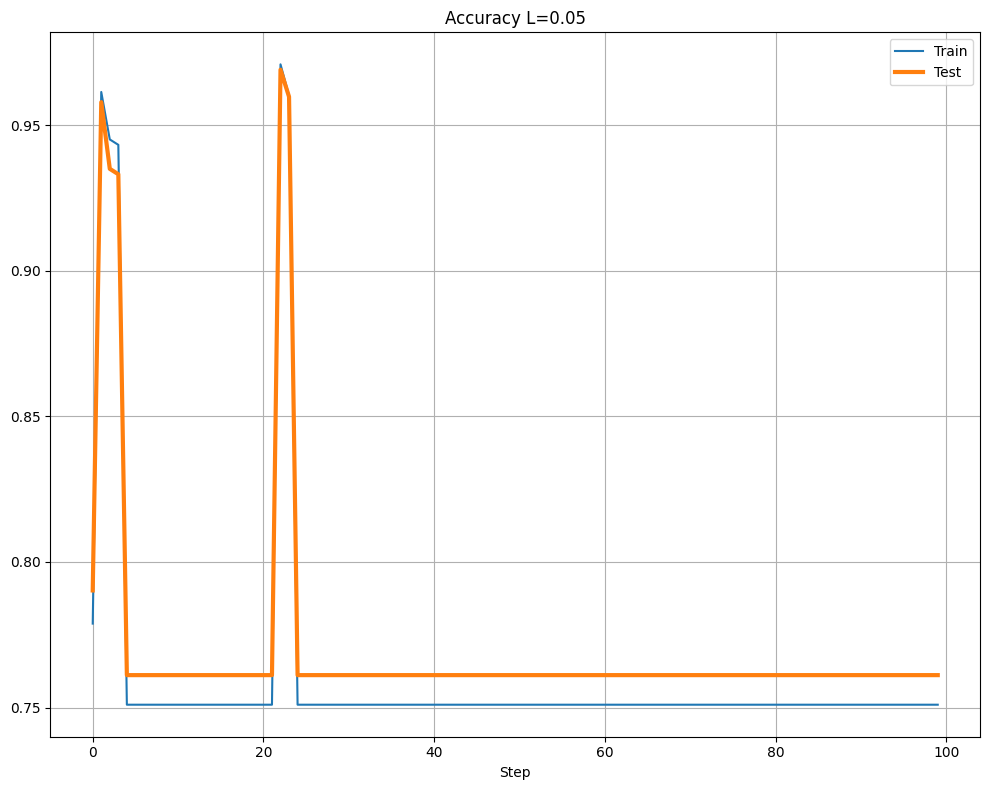

4847


100%|██████████| 100000/100000 [00:20<00:00, 4932.82it/s]


ACCURACY:  0.9678217821782178


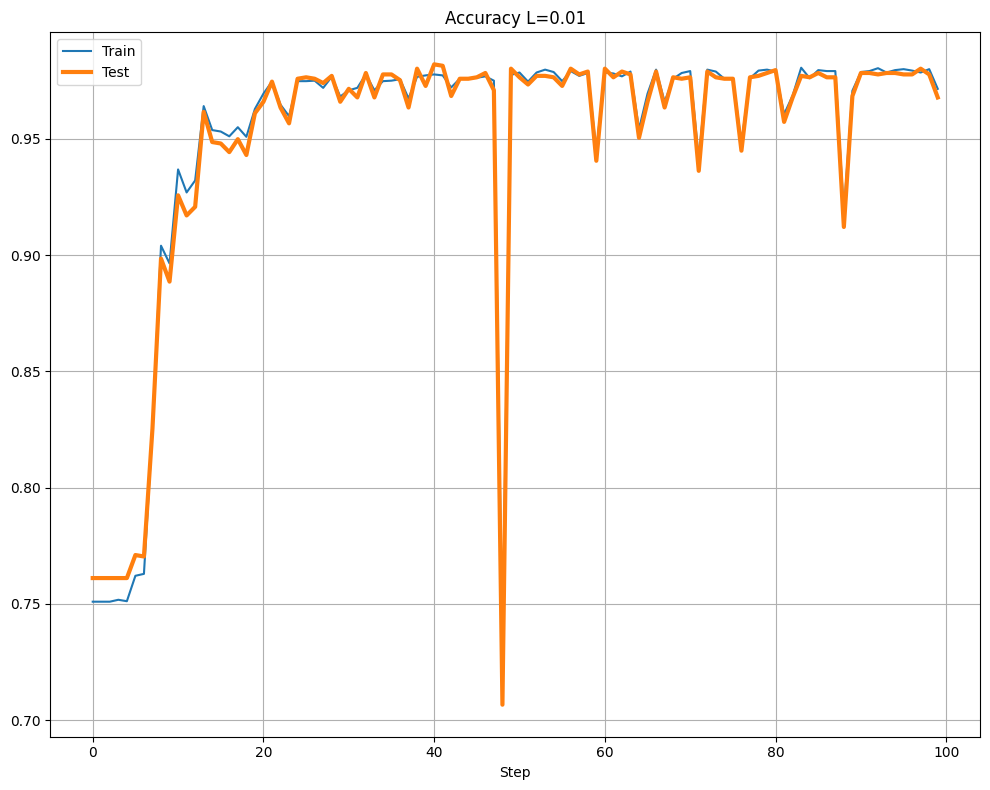

4847


100%|██████████| 100000/100000 [00:20<00:00, 4979.81it/s]


ACCURACY:  0.9777227722772277


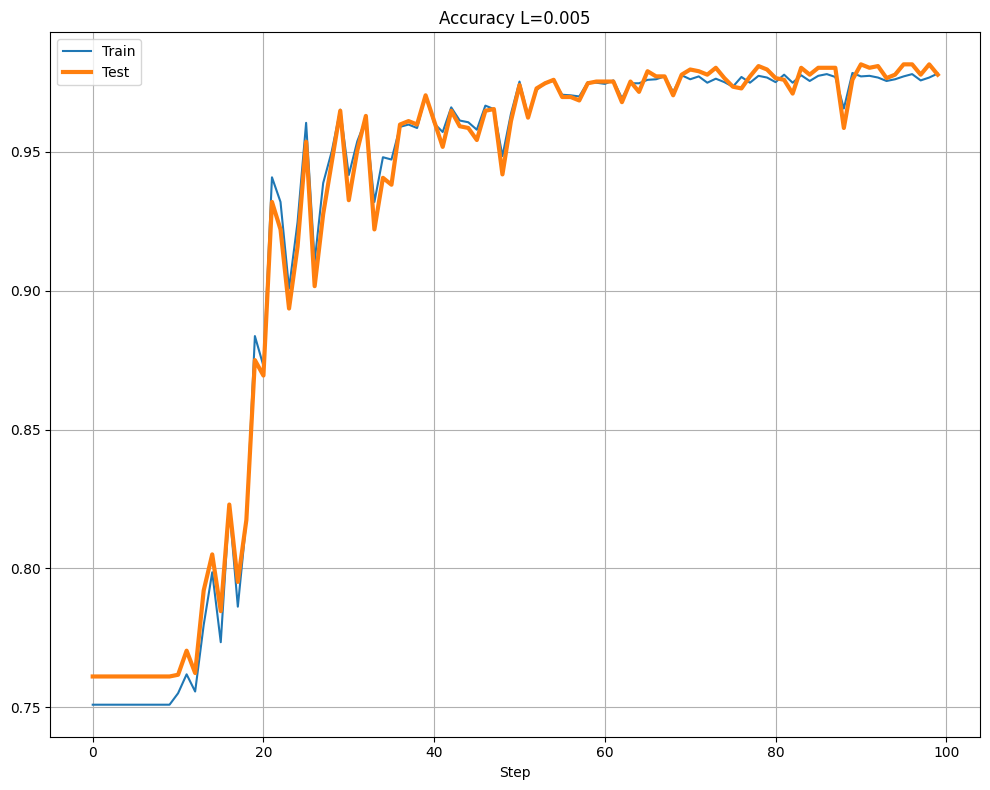

4847


100%|██████████| 100000/100000 [00:20<00:00, 4928.03it/s]


ACCURACY:  0.8038366336633663


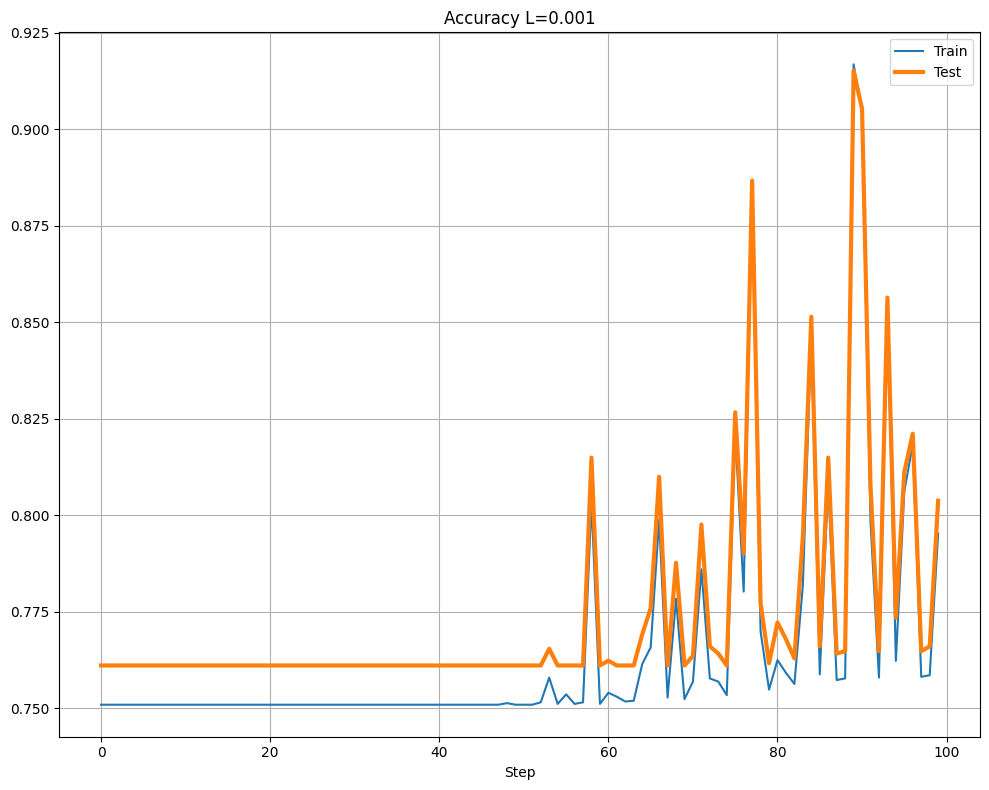

In [28]:
iters_l = [100,1000,10000,100000]
L_l = [0.05,0.01,0.005,0.001]
for iter in iters_l:
    for L in L_l :
        miRed(L=L, iters=iter)

Observo que una de las que mas rindio por estadistica es con una L de 0.005 y 100000 iteraciones

CREO EJEMPLOS ALEATORIOS DEL DATAFRAME ESTANDARIZADO

In [29]:
# Definir características de entrada para los nuevos datos
new_features = ["fixed acidity","volatile acidity", "chlorides",
                "free sulfur dioxide","total sulfur dioxide",
                "density","pH", "sulphates"]

# Seleccionar características relevantes de los nuevos datos
# Filtrar ejemplos de vino blanco y rojo
# Busco filas random de el dataset escalado para que los datos se ingresen escalados
# Tomar 5 filas aleatorias del DataFrame 'df'
filas_aleatorias = data.loc[:, ["type"] + features].sample(n=10)

# Imprimir las filas aleatorias
filas_aleatorias

,type,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
29,1,0.534591,0.151899,0.072013,0.069204,0.322727,0.959980,0.798005,0.265
5985,0,0.440252,0.436709,0.148936,0.051903,0.047727,0.958363,0.842893,0.300
4328,1,0.402516,0.196203,0.080196,0.166090,0.384091,0.955966,0.815461,0.225
3652,1,0.452830,0.145570,0.139116,0.065744,0.252273,0.962906,0.773067,0.255
3047,1,0.421384,0.151899,0.063830,0.166090,0.277273,0.953358,0.810474,0.215
3117,1,0.345912,0.120253,0.065466,0.179931,0.234091,0.953108,0.872818,0.195
5440,0,0.723270,0.221519,0.114566,0.034602,0.084091,0.962771,0.827930,0.455
5799,0,0.547170,0.208861,0.103110,0.034602,0.043182,0.957362,0.822943,0.365
5830,0,0.534591,0.297468,0.094926,0.062284,0.086364,0.957843,0.788030,0.425
4210,1,0.402516,0.183544,0.065466,0.072664,0.263636,0.959941,0.783042,0.250


In [30]:
# Eliminar la columna 'type' del DataFrame 'filas_aleatorias'
data_ejemplos = filas_aleatorias.drop(columns=["type"])

# Imprimir el DataFrame después de eliminar la columna
data_ejemplos

,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
29,0.534591,0.151899,0.072013,0.069204,0.322727,0.959980,0.798005,0.265
5985,0.440252,0.436709,0.148936,0.051903,0.047727,0.958363,0.842893,0.300
4328,0.402516,0.196203,0.080196,0.166090,0.384091,0.955966,0.815461,0.225
3652,0.452830,0.145570,0.139116,0.065744,0.252273,0.962906,0.773067,0.255
3047,0.421384,0.151899,0.063830,0.166090,0.277273,0.953358,0.810474,0.215
3117,0.345912,0.120253,0.065466,0.179931,0.234091,0.953108,0.872818,0.195
5440,0.723270,0.221519,0.114566,0.034602,0.084091,0.962771,0.827930,0.455
5799,0.547170,0.208861,0.103110,0.034602,0.043182,0.957362,0.822943,0.365
5830,0.534591,0.297468,0.094926,0.062284,0.086364,0.957843,0.788030,0.425
4210,0.402516,0.183544,0.065466,0.072664,0.263636,0.959941,0.783042,0.250


In [31]:
data_ejemplos.describe()

,fixed acidity,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.480503,0.211392,0.094763,0.090311,0.199545,0.958160,0.813466,0.295000
std,0.108213,0.093696,0.031211,0.057101,0.123375,0.003407,0.030082,0.090216
min,0.345912,0.120253,0.063830,0.034602,0.043182,0.953108,0.773067,0.195000
25%,0.407233,0.151899,0.067103,0.054498,0.084659,0.956315,0.790524,0.231250
50%,0.446541,0.189873,0.087561,0.067474,0.243182,0.958103,0.812968,0.260000
75%,0.534591,0.218354,0.111702,0.142734,0.273864,0.959970,0.826683,0.348750
max,0.723270,0.436709,0.148936,0.179931,0.384091,0.962906,0.872818,0.455000


UTILIZO LA RED NEURONAL PARA PREDECIR QUE TIPO DE VINO ES CADA UNO DE LOS EJEMPLOS

In [32]:
for index, row in data_ejemplos.iterrows():
    ejemplo_actual = row.values.reshape(1, -1)  # Convertir la fila en una matriz de una sola fila
    
    # Propagar hacia adelante el ejemplo actual a través de la red neuronal
    Z1_new, A1_new, Z2_new, A2_new = forward_prop(ejemplo_actual.transpose())

    # Obtener la predicción (0 para vino tinto y 1 para vino blanco) usando un umbral de 0.5
    prediccion_actual = (A2_new > 0.5).astype(int)

    # Mostrar la predicción actual
    #print(ejemplo_actual)
    #print(" ")
    print("Predicción para el ejemplo", index, ":", prediccion_actual)
    print("Activaciones de la capa de salida para el ejemplo", index, ":", A2_new)
    print(" ")
    print(" ")

Predicción para el ejemplo 29 : [[1]]
Activaciones de la capa de salida para el ejemplo 29 : [[0.99928999]]
 
 
Predicción para el ejemplo 5985 : [[0]]
Activaciones de la capa de salida para el ejemplo 5985 : [[0.00934042]]
 
 
Predicción para el ejemplo 4328 : [[1]]
Activaciones de la capa de salida para el ejemplo 4328 : [[0.99998193]]
 
 
Predicción para el ejemplo 3652 : [[1]]
Activaciones de la capa de salida para el ejemplo 3652 : [[0.99448706]]
 
 
Predicción para el ejemplo 3047 : [[1]]
Activaciones de la capa de salida para el ejemplo 3047 : [[0.99990557]]
 
 
Predicción para el ejemplo 3117 : [[1]]
Activaciones de la capa de salida para el ejemplo 3117 : [[0.99996326]]
 
 
Predicción para el ejemplo 5440 : [[0]]
Activaciones de la capa de salida para el ejemplo 5440 : [[0.00934042]]
 
 
Predicción para el ejemplo 5799 : [[0]]
Activaciones de la capa de salida para el ejemplo 5799 : [[0.00690764]]
 
 
Predicción para el ejemplo 5830 : [[0]]
Activaciones de la capa de salida pa

HAGO LA RED CON SKLEARN

In [33]:
# cargar datos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X = data[features].values
Y = data['type'].values

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(4),
                   activation='relu',
                   max_iter=100_000,
                   learning_rate_init=.005)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
# print(nn.coefs_)
# print("")
# print(nn.intercepts_)
# print("")
# print("")

print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))

Puntaje del conjunto de entrenamiento: 0.981638
Puntaje del conjunto de prueba: 0.977104


PRUEBO CON LOS EJEMPLOS

In [34]:
for index, row in data_ejemplos.iterrows():
    ejemplo_actual = row.values.reshape(1, -1)  # Convertir la fila en una matriz de una sola fila
    predicciones = nn.predict(ejemplo_actual)
    # print(ejemplo_actual)
    # print(" ")
    print("Predicciones:", predicciones)
    print(" ")
    print(" ")

Predicciones: [1]
 
 
Predicciones: [0]
 
 
Predicciones: [1]
 
 
Predicciones: [1]
 
 
Predicciones: [1]
 
 
Predicciones: [1]
 
 
Predicciones: [0]
 
 
Predicciones: [0]
 
 
Predicciones: [0]
 
 
Predicciones: [1]
 
 
